In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv(r"D:\Unsupervised Learning\Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [63]:
df.drop(['status_id', 'status_published'] , axis = 1, inplace = True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


# Encoding

## Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [65]:
df1 = df.copy()

In [66]:
df1['status_type'] = encoder.fit_transform(df1['status_type'])
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


# EDA ( Exploratory DAta Analysis)

In [67]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

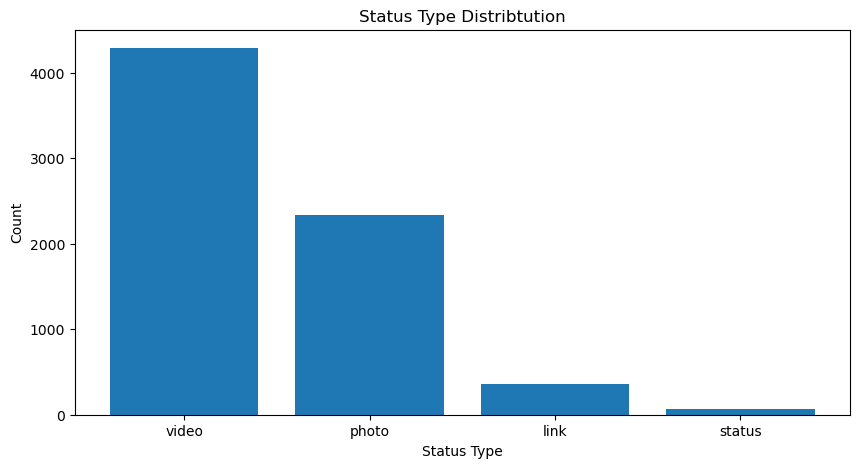

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
value_count = df['status_type'].value_counts()
plt.bar(df['status_type'].unique() , value_count )
plt.title("Status Type Distribtution")
plt.xlabel("Status Type")
plt.ylabel("Count")
plt.show()

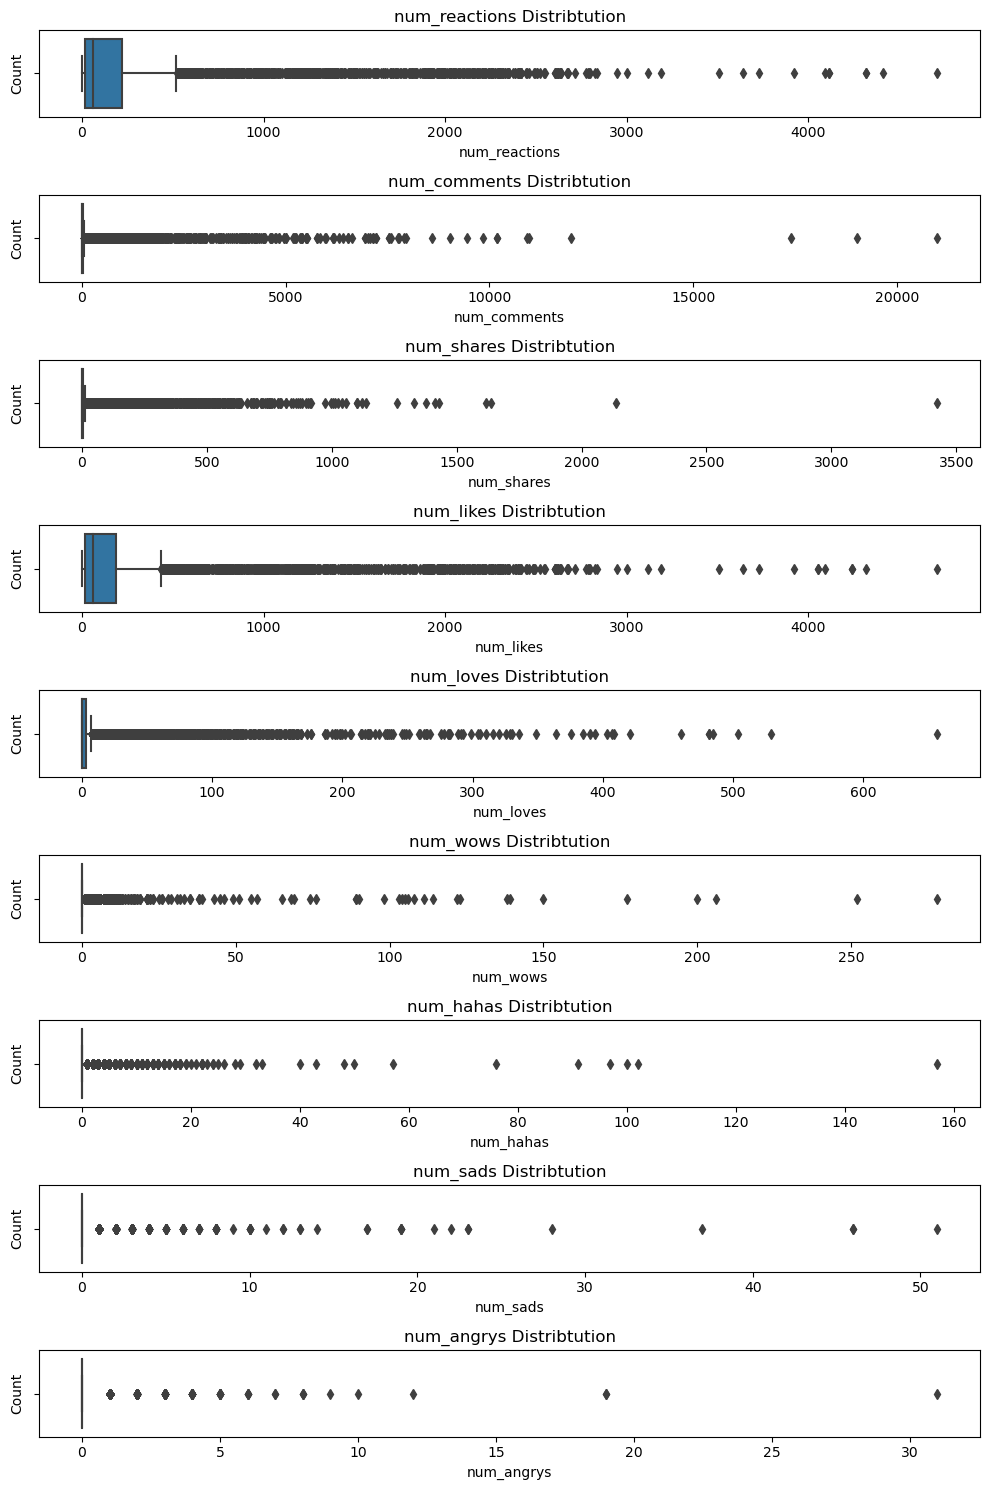

In [69]:
import seaborn as sns
fig , ax = plt.subplots(nrows = 9 , ncols = 1 , figsize = (10,15))
ax = ax.flatten()
for i , col in enumerate(df.columns[1:]):
    sns.boxplot(x = df[col]  , ax = ax[i])
    ax[i].set_title(f"{col} Distribtution")
    ax[i].set_xlabel(f"{col}")
    ax[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

# Missing Values Handling

In [70]:
(df1.isna().sum()/df1.shape[0])*100  # No missing values

status_type      0.0
num_reactions    0.0
num_comments     0.0
num_shares       0.0
num_likes        0.0
num_loves        0.0
num_wows         0.0
num_hahas        0.0
num_sads         0.0
num_angrys       0.0
dtype: float64

# Feature Scaling

## Min Max Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df1.iloc[: , 1:])
df2 = pd.DataFrame(scaled_df , columns = df.columns[1:])
df2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [72]:
df2['status_type'] = df1['status_type']
df2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,3
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,3
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,1
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,1
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,1
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,1


In [73]:
df2.to_csv(r"D:\Unsupervised Learning\Live_scaled.csv")

# Data Partitioning

In [74]:
X = df2
Y = df2['status_type']

# Hierarchical Clustering

## Dendrogram's - find optimal no of clusters

In [75]:
import scipy.cluster.hierarchy as sch

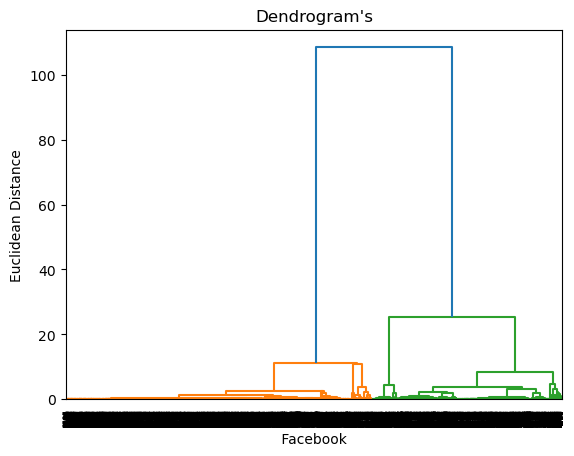

In [76]:
dng = sch.dendrogram(sch.linkage(X, method='ward')) 
# linkage=performs hierarchical/agglomerative clustering # ward -> perform variance minimization algorithm
plt.title("Dendrogram's")
plt.xlabel(" Facebook ")
plt.ylabel("Euclidean Distance")
plt.show()

# Optimal Clusters are 2

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='ward' )
y_cluster = cluster.fit_predict(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [79]:
y_cluster

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [80]:
Y

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int32

In [90]:
result_cnt = Y==y_cluster
result_cnt.value_counts()

status_type
True     4288
False    2762
Name: count, dtype: int64

# Accuracy

In [92]:
print("Accuracy of Hierarchical_Clustering:",(result_cnt.value_counts()[0]/len(result_cnt))*100,"%")

Accuracy of Hierarchical_Clustering: 60.822695035460995 %


# Visualization

In [85]:
X.columns


Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type'],
      dtype='object')

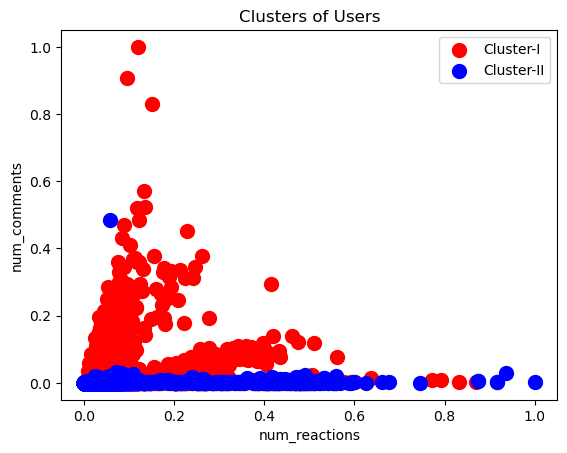

In [88]:
plt.scatter(X.iloc[y_cluster==0 , 0] ,X.iloc[y_cluster==0 , 1] , s=100 , c='red',label = 'Cluster-I' )
plt.scatter(X.iloc[y_cluster==1 , 0] ,X.iloc[y_cluster==1 , 1] , s=100 , c='blue',label = 'Cluster-II' )
plt.title("Clusters of Users")
plt.xlabel("num_reactions")
plt.ylabel("num_comments")
plt.legend()
plt.show()